In [1]:
from __future__ import print_function
import pandas as pd
import os
try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve


def download_file(file_url, folder_path, data_folder, file_name):
#     file_path = os.path.join(folder_path, data_folder, file_name)
    file_path = os.getcwd()+ data_folder+ file_name
    if not os.path.exists(file_path):
        print('Downloading file from ' + file_url + '...')
        urlretrieve(file_url, file_path)
        print('Done downloading file: '+file_path)
        input_file= pd.read_csv(url)
    else:
#         print('File: ' + file_path + ' already exists.')
        print(file_name + ' imported from local computer ')
        input_file= pd.read_csv(os.getcwd()+data_folder + file_name)
    return input_file


def download_dataset():
    print('Downloading Endava support tickets dataset...')
    folder_path =   os.getcwd() #os.path.join(         os.path.dirname(             os.path.abspath(__file__)        ),        'datasets'    )
    url = "https://privdatastorage.blob.core.windows.net/github/support-tickets-classification/datasets/all_tickets.csv"
    data_folder = "\Input_dataset\\"
    file_name = 'all_tickets.csv'
    input_data = download_file(url, folder_path, data_folder, file_name)
    return input_data


if __name__ == "__main__":
    emails_df= download_dataset()

all_tickets.csv imported from local computer 


In [2]:
emails_df = emails_df[emails_df['title'].notna()]
emails_df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4
5,mail,verification warning hi has got attached pleas...,1,4,3,7,89,3,4


# Sentiment Analysis

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [4]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
#     result = "{:-<40} {}".format(sentence, str(score))
#     print(result)
#     return result
    return score

In [5]:
result1 = sentiment_analyzer_scores("The music is bad. But the story is good.")
result1 = sentiment_analyzer_scores("The music is bad.")
# result1 = sentiment_analyzer_scores("The food here is great, but the service is horrible")
result1

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [6]:
from textblob import TextBlob

In [35]:
testimonial =  sentiment_analyzer_scores("hello, please send correct version not happy kind regards lead.")

testimonial = sentiment_analyzer_scores("confluence hello please help create user confluence possible kind regards discipline lead.")
print("confluence hello please help create user confluence possible kind regards discipline lead." , "\n ", testimonial)

testimonial = sentiment_analyzer_scores("confluence hello please help create user confluence possible not happy kind regards discipline lead.")
print("confluence hello please help create user confluence possible not happy kind regards discipline lead." , "\n ",  testimonial)

# testimonial = sentiment_analyzer_scores("confluence hello please help create user confluence possible mistake kind regards discipline lead.")
# print("confluence hello please help create user confluence possible not happy kind regards discipline lead." , "\n ",  testimonial)

confluence hello please help create user confluence possible kind regards discipline lead. 
  {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.8591}
confluence hello please help create user confluence possible not happy kind regards discipline lead. 
  {'neg': 0.264, 'neu': 0.411, 'pos': 0.325, 'compound': 0.0839}


In [8]:
text111= "hello invoice mistake "
testimonial =  sentiment_analyzer_scores(text111)
print(text111, "\n ", testimonial)

text111= "Story excellent but script  bad"
testimonial = sentiment_analyzer_scores("confluence hello please help create user confluence possible not happy kind regards discipline lead.")
print(text111, "\n ",  testimonial)

text111= "The music is bad. But the story is good."
testimonial = sentiment_analyzer_scores("confluence hello please help create user confluence possible mistake kind regards discipline lead.")
print(text111, "\n ",  testimonial)

hello invoice mistake  
  {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.34}
Story excellent but script  bad 
  {'neg': 0.264, 'neu': 0.411, 'pos': 0.325, 'compound': 0.0839}
The music is bad. But the story is good. 
  {'neg': 0.115, 'neu': 0.383, 'pos': 0.502, 'compound': 0.7964}


In [9]:
emails_df.iloc[478,1]

'confluence hello please help create user confluence possible kind regards discipline lead'

In [10]:
emails_df.iloc[2,1]

'requesting meeting hi please help follow equipments cable pc cord plug'

In [11]:
def Sentiment_TextBlob(sentense):
    testimonial =  TextBlob(sentense)
    return testimonial.sentiment.polarity

In [12]:
# import re
# import json
# m = re.search('{(.+?)}', result1)
# if m:
#     found = m.group(0)
       
#     json_acceptable_string = found.replace("'", "\"")
#     d = json.loads(json_acceptable_string)

#     print((d))

In [13]:
emails_df['Sentiment'] = emails_df['body'].map(sentiment_analyzer_scores)

In [14]:
Sentiment_result= emails_df['Sentiment'].apply(pd.Series)
del emails_df['Sentiment']
emails_df= pd.concat([emails_df,pd.DataFrame(Sentiment_result)], axis=1)
emails_df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,neg,neu,pos,compound
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,0.000,0.521,0.479,0.8442
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4,0.000,0.729,0.271,0.6369
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,0.000,0.643,0.357,0.6124
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4,0.013,0.741,0.246,0.9869
5,mail,verification warning hi has got attached pleas...,1,4,3,7,89,3,4,0.225,0.469,0.305,0.4019


In [15]:
emails_df['Positive'] = 0
emails_df['Negative'] = 0
emails_df['Neutral'] = 0

In [16]:
# if (emails_df[emails_df['compound'] >=0.5] ):
#     emails_df['Positive'] =1
# elif (emails_df[emails_df['compound']<=-0.5]):
#     emails_df['Negative'] = 1
# elif ((emails_df[emails_df['compound'] > -0.5]) & (emails_df[emails_df['compound'] < 0.5])):
#     emails_df['Neutral'] =1
    
    
emails_df.loc[emails_df['compound'] >= 0.5, ['Positive']] = 1
emails_df.loc[emails_df['compound'] <= -0.5, ['Negative']] = 1
emails_df.loc[ (emails_df['compound'] > -0.5)  & (emails_df['compound'] < 0.5), ['Neutral']] = 1


In [17]:
emails_df.tail(5)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,neg,neu,pos,compound,Positive,Negative,Neutral
48544,git space for a project issues with adding users,sent tuesday july re git space for hi got righ...,0,4,21,1,39,1,3,0.020,0.750,0.230,0.9893,1,0,0
48545,error,sent july error hi guys can you help out with ...,0,4,9,41,10,2,3,0.178,0.493,0.329,0.5574,1,0,0
48546,connection issues,sent tuesday july connection issues hello have...,0,5,32,0,32,2,3,0.082,0.793,0.125,0.4215,0,0,1
48547,error cube reports,sent tuesday july error hello guys have receiv...,0,4,21,41,35,1,3,0.087,0.787,0.127,0.3612,0,0,1
48548,running out on extensions,hello please be advised we running out extensi...,0,4,51,98,96,2,3,0.000,0.750,0.250,0.9231,1,0,0


In [18]:
(emails_df[emails_df['neg'] > 0.5 ]).tail(2)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,neg,neu,pos,compound,Positive,Negative,Neutral
47528,issue urgent,"sent thursday october ..., bitten die die",0,4,21,1,95,2,3,0.609,0.391,0.0,-0.8316,0,1,0
47844,problem system starting,problem when starting,0,4,21,41,32,2,3,0.574,0.426,0.0,-0.4019,0,0,1


In [19]:
def Sentiment_TextBlob(sentense):
    testimonial =  TextBlob(sentense)
    return testimonial.sentiment.polarity

In [20]:
emails_df['Polarity'] = emails_df['body'].map(Sentiment_TextBlob)
emails_df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,neg,neu,pos,compound,Positive,Negative,Neutral,Polarity
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,0.000,0.521,0.479,0.8442,1,0,0,0.037500
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4,0.000,0.729,0.271,0.6369,1,0,0,0.100000
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,0.000,0.643,0.357,0.6124,1,0,0,0.000000
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4,0.013,0.741,0.246,0.9869,1,0,0,0.215513
5,mail,verification warning hi has got attached pleas...,1,4,3,7,89,3,4,0.225,0.469,0.305,0.4019,0,0,1,1.000000


In [21]:
emails_df.iloc[150:160,1]

152    increasing limit size hi limit increased becau...
153    re create snapshot production dear please user...
154    mom intermittent hi guys please highlighted bi...
155    reaching out hi guys received seems little sus...
156    report requirement hi please rise assign thank...
157    communication hello please kind via merge atta...
158    hello please advise layout attached example ch...
159    re updated hello sorry bother yet currently vi...
160    device recovery report printer duplex unit pri...
161    low score registration hello please modify sur...
Name: body, dtype: object

In [22]:
# type(emails_df['Polarity'][1])
text111= pd.DataFrame(emails_df[emails_df['compound'] == -0.8227]).iloc[:,1]

In [23]:
len(emails_df[emails_df['compound']<=-0.5])

1057

In [24]:
len(emails_df[emails_df['compound'] >=0.5])

36337

In [25]:
len(emails_df[emails_df['Polarity'] <= - 0.3])

590

In [26]:
len(emails_df[emails_df['Polarity']>= 0.5])

6358

In [27]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
# import nltk
# nltk.downloader.download('vader_lexicon')

In [29]:
# SIA = SentimentIntensityAnalyzer()
# print((SIA.lexicon))

In [30]:
import nltk 
nltk.download('punkt')
inputstring = '\n No my invoice calculation is not correct. \n \n Thanks \n Adam, Adam.  \n \n-----Original Message-----  \n  Dear Adam, I see that your invoice calculation has no mistakes. \n \n Best Regards, \n Customer Support. '
from nltk.tokenize import sent_tokenize
all_sent = sent_tokenize(inputstring)
print("Original Email")
print("______________")
print(inputstring)
print("\n")
print("Sentense split")
print("________________\n\n")
print(all_sent)


Original Email
______________

 No my invoice calculation is not correct. 
 
 Thanks 
 Adam, Adam.  
 
-----Original Message-----  
  Dear Adam, I see that your invoice calculation has no mistakes. 
 
 Best Regards, 
 Customer Support. 


Sentense split
________________


['\n No my invoice calculation is not correct.', 'Thanks \n Adam, Adam.', '-----Original Message-----  \n  Dear Adam, I see that your invoice calculation has no mistakes.', 'Best Regards, \n Customer Support.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mashv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
from nltk.tokenize import word_tokenize
# text1 = "It's true that the chicken was the best bamboozler in the known multiverse."
tokens = word_tokenize(inputstring)
print("Original Email")
print("______________")
print(inputstring)
print("\n")
print("Tokanized string")
print("________________\n\n")
print(tokens)

Original Email
______________

 No my invoice calculation is not correct. 
 
 Thanks 
 Adam, Adam.  
 
-----Original Message-----  
  Dear Adam, I see that your invoice calculation has no mistakes. 
 
 Best Regards, 
 Customer Support. 


Tokanized string
________________


['No', 'my', 'invoice', 'calculation', 'is', 'not', 'correct', '.', 'Thanks', 'Adam', ',', 'Adam', '.', '--', '--', '-Original', 'Message', '--', '--', '-', 'Dear', 'Adam', ',', 'I', 'see', 'that', 'your', 'invoice', 'calculation', 'has', 'no', 'mistakes', '.', 'Best', 'Regards', ',', 'Customer', 'Support', '.']


In [32]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


# example_sent = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(inputstring) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

print("Original Email")
print("______________")
print(inputstring)
print("\n")
print("Stopwords Removed")
print("_________________")
# print(word_tokens) 
print(filtered_sentence) 

Original Email
______________

 No my invoice calculation is not correct. 
 
 Thanks 
 Adam, Adam.  
 
-----Original Message-----  
  Dear Adam, I see that your invoice calculation has no mistakes. 
 
 Best Regards, 
 Customer Support. 


Stopwords Removed
_________________
['No', 'invoice', 'calculation', 'correct', '.', 'Thanks', 'Adam', ',', 'Adam', '.', '--', '--', '-Original', 'Message', '--', '--', '-', 'Dear', 'Adam', ',', 'I', 'see', 'invoice', 'calculation', 'mistakes', '.', 'Best', 'Regards', ',', 'Customer', 'Support', '.']


In [33]:
import nltk
from nltk.corpus import stopwords
print("Stopwords")
print("_________")
print("\n")
print(stopwords.words('english')[0:20],"...etc.")

Stopwords
_________


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his'] ...etc.


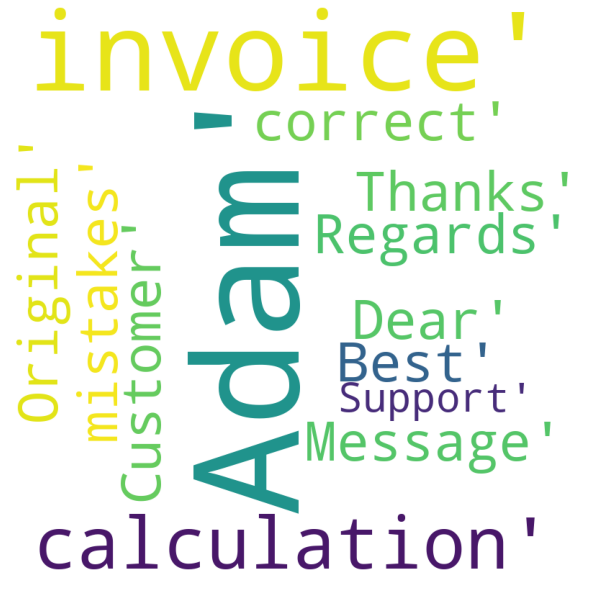

In [34]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


#Final word cloud after all the cleaning and pre-processing
comment_words = ' '
stopwords = stop_words 


for words in tokens: 
    comment_words += " ".join(filtered_sentence)+" "


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10, max_words= 25,min_word_length=5).generate(str(filtered_sentence)) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 